# LAB 5. CONSTRAINED OPTIMIZATION: EQUALITY AND INEQUALITY CONSTRAINTS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib #QPGC = importlib.import_module("QPGC","./QPGC.pyc")

In [2]:
from QPGC import QPGenericConstraints

In [3]:
help(QPGenericConstraints)

Help on function QPGenericConstraints in module QPGC:

QPGenericConstraints(G, g, A, C, b, d)
    Convex optimization problem with equality and inequality constraints:
     
               min f(x)=1/2 x^T G X + g^T x     s.t.   A^T x = b i C^T x >= d
    
    Call it with:
    
    x = QPGenericConstrains(G, g, A, C, b, d)
    
    Notation:
    
    n = number of variables
    p = number of equality constants
    m = number of inequality constants
     
    Dimensions:   G -> n x n
                  g -> n x 1
                  A -> n x p
                  C -> n x m
                  b -> p x 1  
                  d -> m x 1



In [4]:
def Y(y):
    Y=np.diagflat(y)
    return Y

In [5]:
def G(X,Y):
    return np.dot(Y,np.dot(X.T,np.dot(X,Y)))

In [6]:
def g(n_samples):  # n_samples=m
    return (-1)*np.ones(n_samples)

In [7]:
def A(y):
    return y

In [8]:
b=0

In [9]:
def C(n_samples): # n_samples=m
    return np.block([[np.eye(n_samples)],[-np.eye(n_samples)]]).T

In [10]:
def d(n_samples, K): # n_samples=m
    return np.r_[np.zeros(n_samples), -K * np.ones(n_samples)]

In [11]:
def data_gen(m1,s1,m2,s2,n_samples,n_true):                            # n_samples=m
    X_plus = np.random.multivariate_normal(m1,s1,n_true).T
    X_minus= np.random.multivariate_normal(m2,s2,n_samples-n_true).T
    X=np.block([X_plus,X_minus])
    y=np.r_[np.ones(n_true),-np.ones(n_samples-n_true)]
    return X,y

In [12]:
m1=[0.,0.]
s1=[[1,-0.9],[-0.9,1]]
m2sep=[3.,6.]
s2sep=[[1,0],[0,1]]
m2nsep=[1.,2.]
s2nsep=s2sep

## SIMPLE CASE

In [13]:
np.random.seed(8)
n_samples=4
K=1
X,y=data_gen(m1,s1,m2sep,s2sep,4,2)

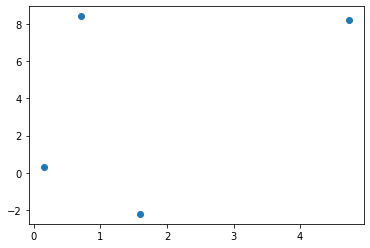

(array([[ 0.15512288,  1.58767474,  0.70350843,  4.72783617],
        [ 0.3329136 , -2.2076691 ,  8.4098343 ,  8.20455628]]),
 array([ 1.,  1., -1., -1.]))

In [14]:
plt.scatter(X[0], X[1])
plt.show()
X,y

In [15]:
v1,v2,v3,v4,v5,v6=G(X,Y(y)), g(n_samples), A(y), C(n_samples), b, d(n_samples,K)

In [17]:
x=QPGenericConstraints(v1, v2, v3, v4, v5, v6)

IndexError: tuple index out of range